# Gradient Descent with Linear Regresssion

The multiple linear regression can be represented in matrix form as:


$$
\begin{bmatrix}
y_1 \\ 
y_2 \\
\vdots \\
y_n
\end{bmatrix} =   \begin{bmatrix}
  1 & x_{11} & \cdots & x_{1d} \\
  1 & x_{21} & \cdots & x_{2d} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_{n1} & \cdots & x_{nd}
 \end{bmatrix}\begin{bmatrix}
\beta_0 \\ 
\beta_1 \\
\vdots \\
\beta_d
\end{bmatrix}
$$

For 3 sample features,
 
$$\hat{y_i} = β_0x_{i0} + β_1x_{i1} + β_2x_{i2} + β_3x_{i3}$$


Where,
where for all i = 1 to n, $x_{i0}$ = 1


## Random Initialization of $\beta$

The values of parameters are randomly initialized for $\beta$
$$\therefore \beta = \begin{bmatrix}
\beta_0 \\ 
\beta_1 \\
\beta_2 \\
\beta_3
\end{bmatrix}$$

## Cost Function

The cost function $J(.)$ is sum of squared erros multiplied by $1/2$ to make derivation easier. The $1/2$ multiplication only changes cost function value not optimal parameters.

$$
\begin{align*}
J(\beta_0, \beta_1, \beta_2, \beta_3) &= \frac{1}{2}\sum_{i=1}^{n}(\hat{y_{i}}-{y_{i}})^2 \\
&= \frac{1}{2}\sum_{i=1}^{n}((\beta_0x_{i0}+\beta_1x_{i1} +\beta_2x_{i2} + \beta_3x_{i3})-y_{i})^2
\end{align*}
$$

Can also be written in matriox form as:

$$J(\boldsymbol{\beta}) = \frac{1}{2}\ \sum(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})^2$$

## Gradient Calculation

By performing Partial derivative(gradient) of the cost function with respect to $β0$,$β1$,$β2$,$β3$. We get,

$$
\begin{align*}
\therefore \frac{\partial J}{\partial \beta_0}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i}) \\
\therefore \frac{\partial J}{\partial \beta_1}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i1} \\
\therefore \frac{\partial J}{\partial \beta_2}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i2} \\
\therefore \frac{\partial J}{\partial \beta_3}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i3} \\
\end{align*}
$$

Hence, 
$$
\begin{align*}
\therefore \frac{\partial J}{\partial \beta_j}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{ij} \\
\end{align*}
$$

The generalized expression in matrix form to calculate gradients w.r.t . all parameters simulataneously is,
$$
\begin{align*}
\therefore \frac{\boldsymbol{\partial J}}{\boldsymbol{\partial \beta}}= \mathbf{X^T}(\mathbf{\hat{y}-y}) = \mathbf{X^T}(\mathbf{X\beta-y}) = \begin{bmatrix}
\frac{\partial J}{\partial \beta_0} \\ 
\frac{\partial J}{\partial \beta_1} \\
\frac{\partial J}{\partial \beta_2} \\
\frac{\partial J}{\partial \beta_3} 
\end{bmatrix}
\end{align*}
$$

>Note: $X^T$ is done in order to match the dimension order of $\beta$.

## Gradient Descent

Update the parameters repeatedly using their respective gradient until cost function converges to its minimum value.

$$
\begin{align*}
\beta_0 :=\beta_0-\alpha\frac{\partial J}{\partial \beta_0} \\
\beta_1 :=\beta_1-\alpha\frac{\partial J}{\partial \beta_1} \\
\beta_2 :=\beta_2-\alpha\frac{\partial J}{\partial \beta_2} \\
\beta_3 :=\beta_3-\alpha\frac{\partial J}{\partial \beta_3} \\
\end{align*}
$$

Hence, 
$$
\begin{align*}
\beta :=\beta-\alpha\frac{\partial J}{\partial \beta}\\
\end{align*}
$$



## Exercise: Linear Regression with Gradient Descent

Implementing Linear Regression with Gradient Descent on a [advertising dataset](https://www.statlearning.com/s/Advertising.csv) where _TV_, _radio_ and _newspaper_ are adevertising mediums (input variables) and _sales_ is output variable. 

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Import dataset
path = "https://www.statlearning.com/s/Advertising.csv" 

# Read the CSV data from the link
df = pd.read_csv(path, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
def features(df, feature):  
    # Feature matrix
    X = df[feature].values

    # Adding the column of ones in X
    X = np.c_[np.ones((X.shape[0], 1)), X]
    # print(X)

    # Outputs
    y = df['sales'].values.reshape(-1, 1)

    n = X.shape[0] # number of rows
    d = X.shape[1] # number of columns
    return X, y, d

feature = ['TV', 'radio', 'newspaper']
X, y, d = features(df, feature)

In [4]:
# Random initialization of beta
def beta_init():
    np.random.seed(0)
    betas = np.random.randn(d, 1)
    return betas

betas = beta_init()
betas

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ]])

In [5]:
# Cost Function
def calculate_cost(betas):
    return (1/2 * np.sum(np.square(np.dot(X, betas) - y)))

calculate_cost(betas)

2303714.226243876

In [6]:
# Calculating gradients of cost function 
def calculate_gradients(betas):
    return np.dot(X.T, (np.dot(X, betas) - y))

calculate_gradients(betas)

array([[  27563.85598559],
       [4631129.37253468],
       [ 731917.2683292 ],
       [1079270.65268036]])

In [7]:
# Calculate gradient descent
def gradient_descent(X, y, alpha=3e-3, max_iter=10000, precision=1e-3, print_iter=100):
    iteration, diff = 0, 1
    betas = beta_init() 
    cost = calculate_cost(betas)    # Initial cost parameter
    costs = [calculate_cost(betas)] # list containing the history of costs for different iterations

    while diff > precision and iteration <= max_iter:
        # Update value of parameters
        betas = betas - alpha * calculate_gradients(betas)

        # Cost for the new parameter
        cost = calculate_cost(betas)

        # Difference between updated and old cost
        diff = np.abs(costs[iteration] - cost) 
        costs.append(cost)
        
        if iteration % print_iter == 0:
            print("iteration: {}, cost: {}".format(iteration, cost))
        iteration += 1
        
        if(cost == np.infty):
            print("Cost reached infinity, try smaller learning rate")
            break
        
    return betas, iteration, costs

In [8]:
# For learning rate = 3e-3 
betas, steps, costs = gradient_descent(X, y, print_iter=10)

iteration: 0, cost: 624562462609042.5
iteration: 10, cost: 8.723452830258346e+99
iteration: 20, cost: 1.2186033041567329e+185
iteration: 30, cost: 1.7023007309110772e+270
Cost reached infinity, try smaller learning rate


/tmp/ipykernel_40801/94842492.py:3: RuntimeWarning: overflow encountered in square
  return (1/2 * np.sum(np.square(np.dot(X, betas) - y)))


In [9]:
# For smaller learning rate
betas, steps, costs = gradient_descent(X, y, alpha=3e-7)

iteration: 0, cost: 1605439.1704912463
iteration: 100, cost: 643.2722105591894
iteration: 200, cost: 332.31063352987167
iteration: 300, cost: 302.63386918736694
iteration: 400, cost: 299.5741872450544
iteration: 500, cost: 299.22938542369536


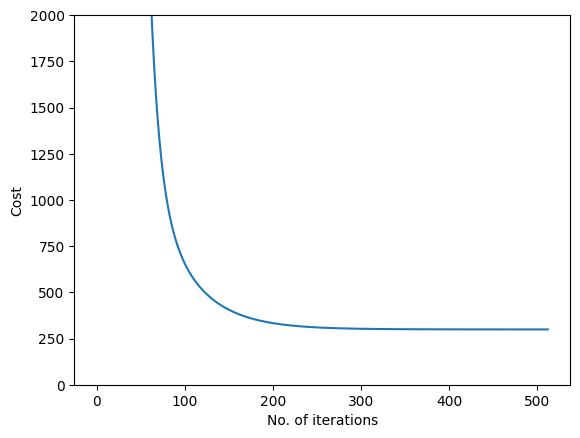

In [10]:
plt.plot(costs)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.ylim(0, 2000)
plt.show();

In [11]:
from IPython.display import display, HTML

message = """<strong>TV, Radio, and Newspaper</strong> <br>
y = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3 <br>
x1 = TV <br>
x2 = radio <br>
x3 = newspaper
""".format(*betas[0], *betas[1], *betas[2], *betas[3])
display(HTML( message ))

The coefficient for Newspaper (β₃) is 0.01, indicating that Newspaper advertising does not have a significant impact on sales when considered alongside TV and Radio. So, including Newspaper in the model does not improve its predictive power.

Excluding Newspaper from the model and focus on optimizing TV and Radio advertising for better sales predictions.

In [12]:
# For smaller learning rate but for TV and Radio only
feature = ['TV', 'radio']
X, y, d = features(df, feature)

betas, steps, costs = gradient_descent(X, y, alpha=3e-7)

iteration: 0, cost: 350725.5891178502
iteration: 100, cost: 591.0561668804862
iteration: 200, cost: 305.7122918041548
iteration: 300, cost: 300.75101319156795


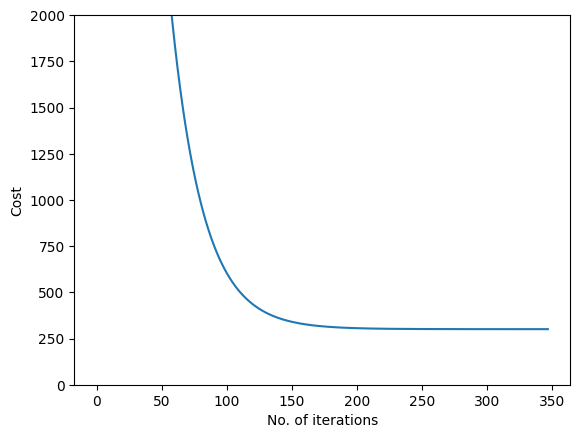

In [13]:
plt.plot(costs)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.ylim(0, 2000)
plt.show();

In [14]:
message = """<strong>TV and Radio</strong> <br>
y = {:.2f} + {:.2f}x1 + {:.2f}x2 <br>
x1 = TV <br>
x2 = radio <br>
""".format(*betas[0], *betas[1], *betas[2])
display(HTML( message ))

### Comparision between OLS and Gradient Descent

| Feature | Ordinary Least Squares (OLS) | Gradient Descent |
|---------|-------------------------------|------------------|
| Approach | Direct method to find optimal parameters | Iterative method to find optimal parameters |
| Hyperparameters | No hyperparameters needed | Requires choosing a learning rate and the number of iterations |
| Constraints | Requires the number of samples $n$ to be greater than the number of features $d$; also requires $(X^TX)^{-1}$ to exist | No such constraints |
| Solution Accuracy | Always gives the exact solution if constraints are met | Solution depends on the learning rate and number of iterations; may not always be exact |
| Time Complexity | \( $O(d^3)$ \) | \( $O(kd^2)$ \) where $k$ is the number of iterations |
| Suitability | Suitable for small to moderate feature sets where $d$ is not very large | Suitable for large feature sets (exceeding 10,000 features) |
